In [1]:
import mio
from matplotlib import pyplot as plt
import numpy as np
import pathlib

In [2]:
#plt.imshow(alt.iloc[6150:6160,6180:6200])

In [3]:
he = mio.read_raster('heights/heights25m.bil')[0]

In [4]:
def real_height(komb_path, he):
    alt = mio.read_raster(komb_path)[0]
    alt = alt.replace(0, np.nan)
    he1 = he.reindex_like(alt, method='ffill')
    res = alt - he1
    # take care over spill!
    res[res < 0] = 0
    res[res > 250] = 250
    res = res.fillna(0).astype('uint8')
    return res

In [5]:
%%time
l = list(pathlib.Path('komb_alt').glob('*_alt.tif'))
iall = len(l)
i = 0
for source in l:
    i += 1
    mio.show_perc(i, iall, 1)
    dest = 'komb/' + source.stem.replace('_alt', '.tif')
    df = real_height(source, he)
    mio.write_raster(df, dest)

0.39% 0.77% 1.16% 1.54% 1.93% 2.32% 2.7% 3.09% 3.47% 3.86% 4.25% 4.63% 5.02% 5.41% 5.79% 6.18% 6.56% 6.95% 7.34% 7.72% 8.11% 8.49% 8.88% 9.27% 9.65% 10.04% 10.42% 10.81% 11.2% 11.58% 11.97% 12.36% 12.74% 13.13% 13.51% 13.9% 14.29% 14.67% 15.06% 15.44% 15.83% 16.22% 16.6% 16.99% 17.37% 17.76% 18.15% 18.53% 18.92% 19.31% 19.69% 20.08% 20.46% 20.85% 21.24% 21.62% 22.01% 22.39% 22.78% 23.17% 23.55% 23.94% 24.32% 24.71% 25.1% 25.48% 25.87% 26.25% 26.64% 27.03% 27.41% 27.8% 28.19% 28.57% 28.96% 29.34% 29.73% 30.12% 30.5% 30.89% 31.27% 31.66% 32.05% 32.43% 32.82% 33.2% 33.59% 33.98% 34.36% 34.75% 35.14% 35.52% 35.91% 36.29% 36.68% 37.07% 37.45% 37.84% 38.22% 38.61% 39.0% 39.38% 39.77% 40.15% 40.54% 40.93% 41.31% 41.7% 42.08% 42.47% 42.86% 43.24% 43.63% 44.02% 44.4% 44.79% 45.17% 45.56% 45.95% 46.33% 46.72% 47.1% 47.49% 47.88% 48.26% 48.65% 49.03% 49.42% 49.81% 50.19% 50.58% 50.97% 51.35% 51.74% 52.12% 52.51% 52.9% 53.28% 53.67% 54.05% 54.44% 54.83% 55.21% 55.6% 55.98% 56.37% 56.76% 57.14% 57.

### Check KML

In [6]:
import simplekml
from shapely.ops import transform
import geopandas as gpd

In [7]:
r_raw = mio.read_raster('komb/Komb1091.tif')[0]

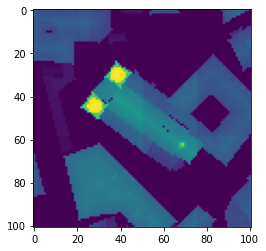

In [8]:
x, y = 683486, 247171 # Grossmünster
d = 50
ra = r_raw.loc[y + d:y - d, x -d : x + d]
plt.imshow(ra)

In [9]:
ve = mio.vectorize(ra)

<AxesSubplot:>

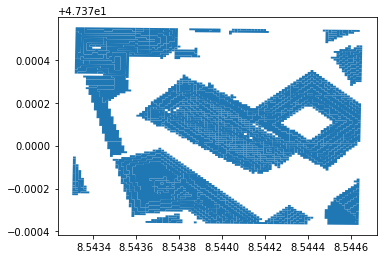

In [10]:
heights = []
polys = []
for ind, row in ve.iterrows():
    height = row.val
    poly = row.geometry
    poly = transform(mio.swiss_wgs, poly)
    heights.append(height)
    polys.append(poly)
gdf = gpd.GeoDataFrame({'height': heights}, geometry=polys)
gdf.plot()

In [11]:
kml = simplekml.Kml()
for ind, row in gdf.iterrows():
    height = row.height
    coords = row.geometry.exterior.coords
    coords = [(x, y, height) for x, y in coords]
    kml.newpolygon(outerboundaryis=coords, extrude=1, altitudemode='relativeToGround')
kml.save('test.kml')

In [12]:
kml

In [13]:
mio.write_tab(gdf, 'test.tab')

740 row(s) written to mapinfo file.
